In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(6, activation='softmax')  # 6 output classes
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()
model.save("/content/basic_cnn_model.h5")
print("Model saved successfully!")

unzip:  cannot find or open /content/IntelDataset/archive.zip, /content/IntelDataset/archive.zip.zip or /content/IntelDataset/archive.zip.ZIP.
ls: cannot access '/content/intel_data/seg_train/seg_train': No such file or directory
ls: cannot access '/content/intel_data/seg_test/seg_test': No such file or directory
ls: cannot access '/content/intel_data/seg_pred/seg_pred': No such file or directory


Found 14034 images belonging to 6 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


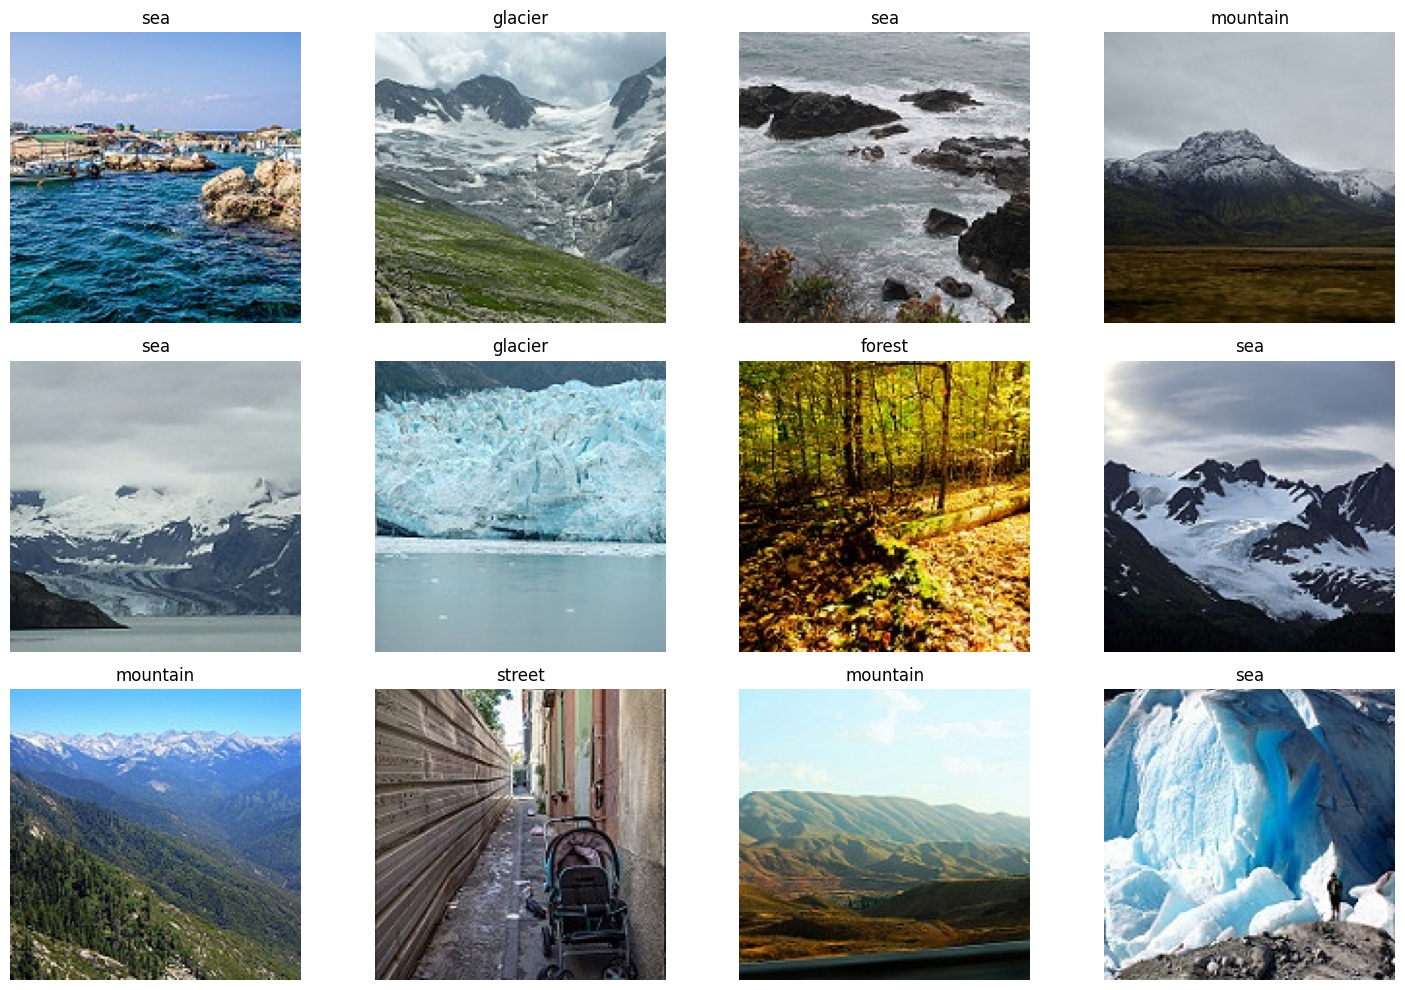

In [ ]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# 1️⃣ Load saved model
model = load_model("/content/basic_cnn_model.h5")

# 2️⃣ Path to prediction folder
pred_dir = "/content/intel_data/archive/seg_pred/seg_pred"

# 3️⃣ Get all image filenames
image_names = [f for f in os.listdir(pred_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# 4️⃣ Limit number of images to display (optional)
num_images = min(12, len(image_names))  # show max 12 images

plt.figure(figsize=(15, 10))

for i, img_name in enumerate(image_names[:num_images]):
    img_path = os.path.join(pred_dir, img_name)

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)

    # Predict class
    pred = model.predict(img_array_exp)
    pred_class = np.argmax(pred, axis=1)[0]

    # Map index to class label
    inv_class_indices = {v: k for k, v in train_generator.class_indices.items()}
    pred_label = inv_class_indices[pred_class]

    # Display in grid
    plt.subplot(3, 4, i+1)  # 3 rows x 4 columns
    plt.imshow(img_array)
    plt.title(pred_label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame(pred_labels, columns=['Image', 'Predicted_Class'])
df.to_csv('/content/predictions.csv', index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv
